## Advanced Regression - House Price Prediction - EPGP ML & AI C37

This notebook has been prepared by <b>Poolakit Bharadwaj</b> for the final submission towards the House Price Prediction assignment

## Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. We are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

## Business Goal

We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
# importing all the important libraries
import numpy as np
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio; pio.renderers.default='notebook'

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset and storing in a DataFrame for data manipulation

df = pd.read_csv('train (1).csv')

#Looking at the DataFrame to understand the structure

pd.options.display.max_columns = None #enable to see all the DataFrame columns

df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [3]:
#Understanding more about the fields and data types

df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
#Looking at the basic dataset stats

df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

## Creating Dataframe copy

In [5]:
#Creating a separate copy of the DataFrame for data manipulation

df_house = df.copy(deep=True) #deep=True won't reflect the changes done to 'df_house' on the original dataframe 'df'

#Looking at the new dataframe

df_house.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Covnerting MSSubClass dtype to object as it is a categorical variable
df_house['MSSubClass'] = df_house['MSSubClass'].astype('object')

In [7]:
# Separating the Numerical and Categorical features for analysis
numeric = df_house.select_dtypes(include=['int64', 'float64'])
categorical = df_house.select_dtypes(include=['object'])

## Missing value treatment

In [8]:
#Options to display all rows in the cell output

pd.options.display.max_rows = None

#Calculating the percentage of missing values for each field in the DataFrame

df_house.isnull().sum() * 100 / len(df_house)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [9]:
df_house.PoolQC.value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [10]:
df_house.PoolQC.unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

#### As per the CSV file, the 'NA' values in the PoolQC variable denote absence of a pool in the property. The NA value has been passed as NaN in Python, showing up as missing values. We need to impute the NaN values with 'None'

In [11]:
df_house["PoolQC"].fillna("None", inplace = True)

df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
#Looking at the MiscFeature next, contains 96% missing values

df_house.MiscFeature.isna().sum()

1406

#### As per the CSV file, the 'NA' values in the MiscFeature variable denote no miscellaneous feature in the property. The NA value has been passed as NaN in Python, showing up as missing values. We need to impute the NaN values with 'None'

In [13]:
df_house["MiscFeature"].fillna("None", inplace = True)

df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [14]:
#Looking at Alley variable next, as it has 93% missing values

df_house.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

#### As per the CSV file, the 'NA' values in the Alley variable denote that there is no alley access to the property. The NA value has been passed as NaN in Python, showing up as missing values. We need to impute the NaN values with 'None'

In [15]:
df_house["Alley"].fillna("None", inplace = True)

df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [16]:
#Looking at the Fence variable next as it has 80% missing values

df_house.Fence.isna().sum()

1179

#### As per the CSV file, the 'NA' values in the Fence variable denote that there is no fence in the property. The NA value has been passed as NaN in Python, showing up as missing values. We need to impute the NaN values with 'None'

In [17]:
df_house["Fence"].fillna("None", inplace = True)

df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [18]:
#Looking at the FireplaceQu variable as it has 47% missing values

df_house.FireplaceQu.isna().sum()

690

#### As per the CSV file, the 'NA' values in the FireplaceQu variable denote that there is no fireplace in the property. The NA value has been passed as NaN in Python, showing up as missing values. We need to impute the NaN values with 'None'

In [19]:
df_house["FireplaceQu"].fillna("None", inplace = True)

df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [20]:
#Looking at the BsmtQual variable, 2.5% missing values

df_house.BsmtQual.unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

#### As per the CSV file, the 'NA' values in the BsmtQual variable denote that there is no basement in the property. The NA value has been passed as NaN in Python, showing up as missing values. We need to impute the NaN values with 'None'

In [21]:
df_house["BsmtQual"].fillna("None", inplace = True)

df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [22]:
#Looking at the BsmtCond variable, 2.5% missing values

df_house.BsmtCond.isna().sum()

37

#### As per the CSV file, the 'NA' values in the BsmtCond variable denote that there is no basement in the property. The NA value has been passed as NaN in Python, showing up as missing values. We need to impute the NaN values with 'None'

In [23]:
df_house["BsmtCond"].fillna("None", inplace = True)

df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [24]:
df_house.BsmtExposure.isna().sum()

38

#### As per the CSV file, the 'NA' values in the BsmtExposure variable denote that there is no basement in the property. The NA value has been passed as NaN in Python, showing up as missing values. We need to impute the NaN values with 'None'

In [25]:
df_house["BsmtExposure"].fillna("None", inplace = True)

df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [26]:
#Looking at the BsmtFinType1 variable, 2.5% missing values

df_house.BsmtFinType1.isna().sum()

37

#### As per the CSV file, the 'NA' values in the BsmtFinType1 variable denote that there is no basement of Type1 in the property. The NA value has been passed as NaN in Python, showing up as missing values. We need to impute the NaN values with 'None'

In [27]:
df_house["BsmtFinType1"].fillna("None", inplace = True)

df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [28]:
#Looking at the BsmtFinType2 variable, 2.6% missing values

df_house.BsmtFinType2.isna().sum()

38

In [29]:
df_house.BsmtFinType2.unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

#### As per the CSV file, the 'NA' values in the BsmtFinType2 variable denote that there is no basement of Type2 in the property. Basement of Type1 could still be present. The NA value has been passed as NaN in Python, showing up as missing values. We need to impute the NaN values with 'None'

In [30]:
df_house["BsmtFinType2"].fillna("None", inplace = True)

df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [31]:
#Looking at GarageType as it has 5.5% missing values

df_house.GarageType.isna().sum()

81

#### As per the CSV file, the 'NA' values in the GarageType variable denote that there is no garage in the property. The NA value has been passed as NaN in Python, showing up as missing values. We need to impute the NaN values with 'None'

In [32]:
df_house["GarageType"].fillna("None", inplace = True)

df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [33]:
df_house.GarageFinish.unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [34]:
#Looking at GarageFinish as it has 5.5% missing values

df_house.GarageFinish.isna().sum()

81

#### As per the CSV file, the 'NA' values in the GarageFinish variable denote that there is no garage in the property. The NA value has been passed as NaN in Python, showing up as missing values. We need to impute the NaN values with 'None'

In [35]:
df_house["GarageFinish"].fillna("None", inplace = True)

df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [36]:
#Looking at GarageQual as it has 5.5% missing values

df_house.GarageQual.isna().sum()

81

#### As per the CSV file, the 'NA' values in the GarageQual variable denote that there is no garage in the property. The NA value has been passed as NaN in Python, showing up as missing values. We need to impute the NaN values with 'None'

In [37]:
df_house["GarageQual"].fillna("None", inplace = True)

df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [38]:
#Looking at GarageCond as it has 5.5% missing values

df_house.GarageCond.isna().sum()

81

#### As per the CSV file, the 'NA' values in the GarageCond variable denote that there is no garage in the property. The NA value has been passed as NaN in Python, showing up as missing values. We need to impute the NaN values with 'None'

In [39]:
df_house["GarageCond"].fillna("None", inplace = True)

df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [40]:
#Looking at Electrical variable, it has 1 missing value

df_house.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

#### We can impute the missing value of Electrical variable with the value 'SBrkr' as it is the most frequently occurring value among similar properties (similar Bldgtype, HouseStyle, YearBuilt, RoofStyle, Foundation, Heating etc.)

In [41]:
df_house["Electrical"].fillna("SBrkr", inplace = True)

df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [42]:
df_house.GarageYrBlt.isna().sum()

81

#### As per the CSV file, the 'NA' values in the GarageYrBlt variable denote that there is no garage in the property. The NA value has been passed as NaN in Python, showing up as missing values. We need to impute the NaN values with 'None'

In [43]:
df_house["GarageYrBlt"].fillna("None", inplace = True)

df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [44]:
#Looking at MasVnrType next

df_house.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [45]:
df_house.MasVnrType.isna().sum()

8

#### Imputing the missing value of MasVnrType variable with the value 'None' as it is the most frequently occurring value among similar properties (similar Bldgtype, HouseStyle, RoofStyle, Foundation, Heating etc.)

In [46]:
df_house["MasVnrType"].fillna("None", inplace = True)

df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [47]:
#Looking at MasVnrArea next

df_house.MasVnrArea.isna().sum()

8

#### Imputing the missing value of MasVnrArea variable with 0 as we have replaced the corresponding MasVnrType values with 'None' and most of the other 'None' values have MasVnrArea = 0

In [48]:
df_house["MasVnrArea"].fillna(0, inplace = True)

df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [49]:
#Looking at LotFrontage as it has 17% missing values

df_house.LotFrontage.isna().sum()

259

In [50]:
df_house.LotFrontage.notnull().sum()

1201

In [51]:
#Replacing the NA values of LotFrontage with the median of non-NA values

df_house["LotFrontage"].fillna(np.median(df_house[df_house.LotFrontage.notnull()].LotFrontage, axis=0), inplace = True)

<AxesSubplot:>

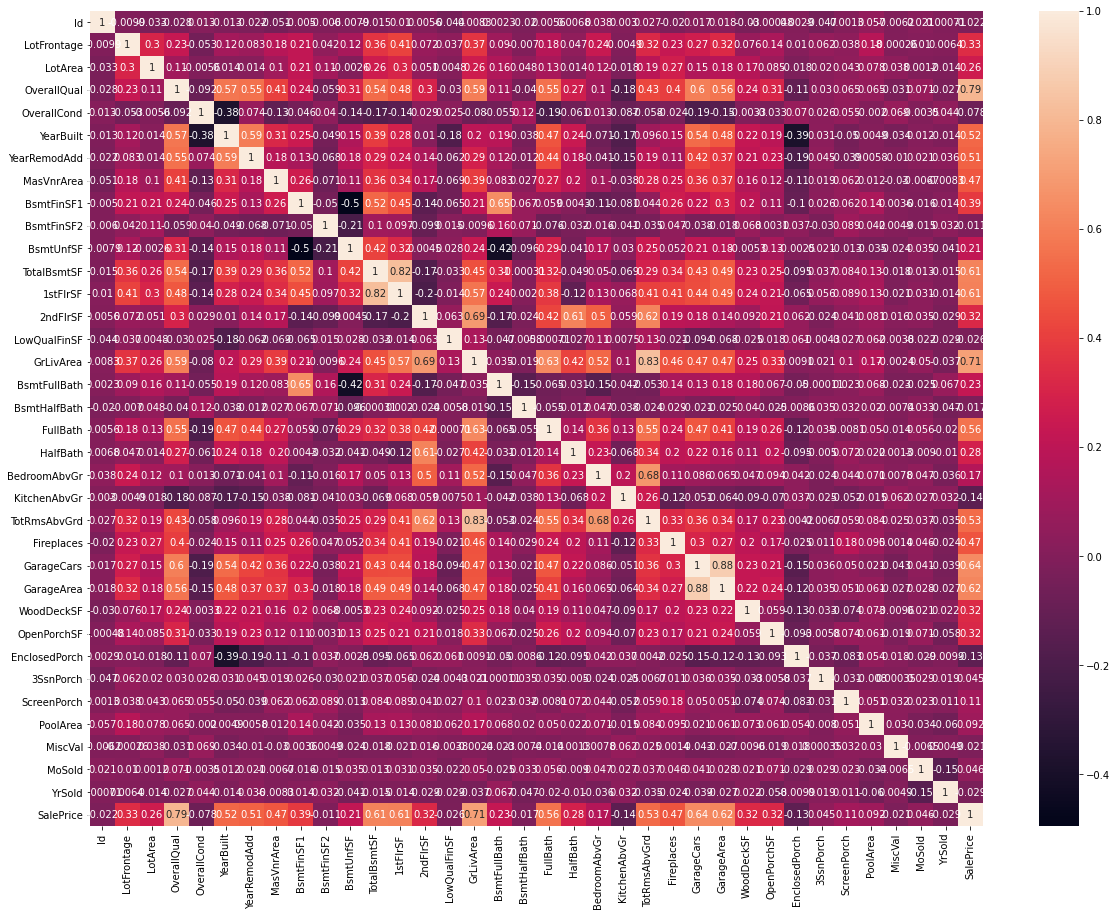

In [52]:
plt.figure(figsize=(20,15))
sns.heatmap(df_house.corr(), annot=True)

## Dropping unnecessary variables

In [53]:
#Dropping Id variable as it's just a row number

df_house.drop('Id', axis=1,inplace=True)

df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## Univariate analysis, bivariate and outlier treatment

In [54]:
#Univariate analysis for LotFrontage variable

plt.figure(figsize=(10,12))

px.violin(df_house, y='LotFrontage', width=600)

#There are some outlier values (more than the upper fence value)

<Figure size 720x864 with 0 Axes>

In [55]:
df_house[df_house.LotFrontage > 107].LotFrontage.count()/len(df_house.LotFrontage)*100



3.9726027397260277

In [56]:
#Replacing upper outlier values with 95%ile and lower values with 5%ile

df_house['LotFrontage'][df_house['LotFrontage'] > np.percentile(df_house['LotFrontage'], 95)] = np.percentile(df_house['LotFrontage'], 95)


df_house['LotFrontage'][df_house['LotFrontage'] < np.percentile(df_house['LotFrontage'], 5)] = np.percentile(df_house['LotFrontage'], 5)

In [57]:
df_house.LotFrontage.describe()

count    1460.000000
mean       69.112568
std        16.509008
min        35.950000
25%        60.000000
50%        69.000000
75%        79.000000
max       104.000000
Name: LotFrontage, dtype: float64

In [58]:
#Univariate analysis for LotArea variable

plt.figure(figsize=(10,12))

px.violin(df_house, y='LotArea', width=600)

#There are some outlier values (more than the upper fence value)

<Figure size 720x864 with 0 Axes>

In [59]:
plt.figure(figsize=(10,12))

px.scatter(df_house, x="LotArea", y="SalePrice")

#Low correlation between LotArea and SalePrice

<Figure size 720x864 with 0 Axes>

In [60]:
# Replacing the upper outlier values with 95%ile

df_house['LotArea'][df_house['LotArea'] > np.percentile(df_house.LotArea,95)] = np.percentile(df_house.LotArea,95)

# Replacing the values below 5th percentile with 5th percentile value

df_house['LotArea'][df_house['LotArea'] < np.percentile(df_house.LotArea,5)] = np.percentile(df_house.LotArea,5)

In [61]:
#Univariate analysis for MasVnrArea variable

plt.figure(figsize=(10,12))

px.violin(df_house, y='MasVnrArea', width=600)

#There are some outlier values (more than the upper fence value)

<Figure size 720x864 with 0 Axes>

In [62]:
plt.figure(figsize=(10,12))

px.scatter(df_house, x="MasVnrArea", y="SalePrice")

#Low correlation between MasVnrArea and SalePrice

<Figure size 720x864 with 0 Axes>

In [63]:
# Replacing the values beyond 95%ile with 95%ile value and lower values with 5%ile

df_house['MasVnrArea'][df_house['MasVnrArea'] > np.percentile(df_house.MasVnrArea,95)] = np.percentile(df_house.MasVnrArea,95)

df_house['MasVnrArea'][df_house['MasVnrArea'] < np.percentile(df_house.MasVnrArea,5)] = np.percentile(df_house.MasVnrArea,5)


In [64]:
#Univariate analysis for BsmtFinSF1 variable

plt.figure(figsize=(10,12))

px.violin(df_house, y='BsmtFinSF1', width=600)

#There are some outlier values (more than the upper fence value)

<Figure size 720x864 with 0 Axes>

In [65]:
# Replacing the upper outlier values with 95%ile

df_house['BsmtFinSF1'][df_house['BsmtFinSF1'] > np.percentile(df_house['BsmtFinSF1'],95)] = np.percentile(df_house['BsmtFinSF1'],5)

# Replacing the lower values with 5 %ile

df_house['BsmtFinSF1'][df_house['BsmtFinSF1'] < np.percentile(df_house['BsmtFinSF1'],5)] = np.percentile(df_house['BsmtFinSF1'],5)

In [66]:
#Univariate analysis for BsmtFinSF2 variable

plt.figure(figsize=(10,12))

px.violin(df_house, y='BsmtFinSF2', width=600)

<Figure size 720x864 with 0 Axes>

In [67]:
plt.figure(figsize=(10,12))

px.scatter(df_house, x="BsmtFinSF2", y="SalePrice")

#Low correlation

<Figure size 720x864 with 0 Axes>

In [68]:
# Replacing the values beyond 98%ile with 98%ile value

df_house['BsmtFinSF2'][df_house['BsmtFinSF2'] > np.percentile(df_house.BsmtFinSF2,98)] = np.percentile(df_house.BsmtFinSF2,98)

# Replacing the values below 2%ile with 2%ile value

df_house['BsmtFinSF2'][df_house['BsmtFinSF2'] < np.percentile(df_house.BsmtFinSF2,2)].BsmtFinSF2 = np.percentile(df_house.BsmtFinSF2,2)

In [69]:
#Univariate analysis for BsmtUnfSF variable

plt.figure(figsize=(10,12))

px.violin(df_house, y='BsmtUnfSF', width=600)

#There are some outlier values (more than the upper fence value)

<Figure size 720x864 with 0 Axes>

In [70]:
plt.figure(figsize=(10,12))

px.scatter(df_house, x="BsmtUnfSF", y="SalePrice")

#Low correlation

<Figure size 720x864 with 0 Axes>

In [71]:
# Replacing the upper outlier values with 95%ile

df_house['BsmtUnfSF'][df_house['BsmtUnfSF'] > np.percentile(df_house['BsmtUnfSF'],95)] = np.percentile(df_house['BsmtUnfSF'],95)

# Replacing the lower values with 5%ile

df_house['BsmtUnfSF'][df_house['BsmtUnfSF'] < np.percentile(df_house['BsmtUnfSF'],5)] = np.percentile(df_house['BsmtUnfSF'],5)

In [72]:
#Univariate analysis for TotalBsmtSF variable

plt.figure(figsize=(10,12))

px.violin(df_house, y='TotalBsmtSF', width=600)

#There are some outlier values (more than the upper fence value)

<Figure size 720x864 with 0 Axes>

In [73]:
plt.figure(figsize=(10,12))

px.scatter(df_house, x="TotalBsmtSF", y="SalePrice")

<Figure size 720x864 with 0 Axes>

In [74]:
# Replacing the upper outlier values with 95%ile and lowe values with 5%ile

df_house['TotalBsmtSF'][df_house['TotalBsmtSF'] > np.percentile(df_house['TotalBsmtSF'],95)] = np.percentile(df_house['TotalBsmtSF'],95)


df_house['TotalBsmtSF'][df_house['TotalBsmtSF'] < np.percentile(df_house['TotalBsmtSF'],5)] = np.percentile(df_house['TotalBsmtSF'],5)

In [75]:
#Univariate analysis for 1stFlrSF variable

plt.figure(figsize=(10,12))

px.violin(df_house, y='1stFlrSF', width=600)

<Figure size 720x864 with 0 Axes>

In [76]:
plt.figure(figsize=(10,12))

px.scatter(df_house, x="1stFlrSF", y="SalePrice")

<Figure size 720x864 with 0 Axes>

In [77]:
# Replacing the upper outlier values with 95%ile and lower values with 5%ile

df_house['1stFlrSF'][df_house['1stFlrSF'] > np.percentile(df_house['1stFlrSF'],95)] = np.percentile(df_house['1stFlrSF'],95)

df_house['1stFlrSF'][df_house['1stFlrSF'] < np.percentile(df_house['1stFlrSF'],5)] = np.percentile(df_house['1stFlrSF'],5)

In [78]:
#Univariate analysis for 2ndFlrSF variable

plt.figure(figsize=(10,12))

px.violin(df_house, y='2ndFlrSF', width=600)

#There are some outlier values (more than the upper fence value)

<Figure size 720x864 with 0 Axes>

In [79]:
plt.figure(figsize=(10,12))

px.scatter(df_house, x="2ndFlrSF", y="SalePrice")

<Figure size 720x864 with 0 Axes>

In [80]:
# Replacing the upper outlier values with 95%ile and lower values with 5%ile

df_house['2ndFlrSF'][df_house['2ndFlrSF'] > np.percentile(df_house['2ndFlrSF'],95)] = np.percentile(df_house['2ndFlrSF'],95)

df_house['2ndFlrSF'][df_house['2ndFlrSF'] < np.percentile(df_house['2ndFlrSF'],5)] = np.percentile(df_house['2ndFlrSF'],5)

In [81]:
#Univariate analysis for LowQualFinSF variable

plt.figure(figsize=(10,12))

px.violin(df_house, y='LowQualFinSF', width=600)

#There are some outlier values (more than the upper fence value)

<Figure size 720x864 with 0 Axes>

In [82]:
plt.figure(figsize=(10,12))

px.scatter(df_house, x="LowQualFinSF", y="SalePrice")
#low correlation

<Figure size 720x864 with 0 Axes>

In [83]:
# Replacing the upper outlier values with 96%ile and lower values with 5%ile

df_house['LowQualFinSF'][df_house['LowQualFinSF'] > np.percentile(df_house['LowQualFinSF'],96)] = np.percentile(df_house['LowQualFinSF'],96)

df_house['LowQualFinSF'][df_house['LowQualFinSF'] < np.percentile(df_house['LowQualFinSF'],5)] = np.percentile(df_house['LowQualFinSF'],5)

In [84]:
#Univariate analysis for GrLivArea variable

plt.figure(figsize=(10,12))

px.violin(df_house, y='GrLivArea', width=600)

#There are some outlier values (more than the upper fence value)

<Figure size 720x864 with 0 Axes>

In [85]:
# Replacing the upper outlier values with 95%ile and lower values with 5%ile

df_house['GrLivArea'][df_house['GrLivArea'] > np.percentile(df_house['GrLivArea'],95)] = np.percentile(df_house['GrLivArea'],95)

df_house['GrLivArea'][df_house['GrLivArea'] < np.percentile(df_house['GrLivArea'],5)] = np.percentile(df_house['GrLivArea'],5)

In [86]:
#Univariate analysis for GarageArea variable

plt.figure(figsize=(10,12))

px.violin(df_house, y='GarageArea', width=600)

#There are some outlier values (more than the upper fence value)

<Figure size 720x864 with 0 Axes>

In [87]:
plt.figure(figsize=(10,12))

px.scatter(df_house, x="GarageArea", y="SalePrice")


<Figure size 720x864 with 0 Axes>

In [88]:
# Replacing the upper outlier values with 95%ile and lower values with 5%ile

df_house['GarageArea'][df_house['GarageArea'] > np.percentile(df_house['GarageArea'],95)] = np.percentile(df_house['GarageArea'],95)

df_house['GarageArea'][df_house['GarageArea'] < np.percentile(df_house['GarageArea'],5)] = np.percentile(df_house['GarageArea'],5)

In [89]:
#Univariate analysis for WoodDeckSF variable

plt.figure(figsize=(10,12))

px.violin(df_house, y='WoodDeckSF', width=600)

#There are some outlier values (more than the upper fence value)

<Figure size 720x864 with 0 Axes>

In [90]:
plt.figure(figsize=(10,12))

px.scatter(df_house, x="WoodDeckSF", y="SalePrice")


<Figure size 720x864 with 0 Axes>

In [91]:
# Replacing the upper outlier values with 95%ile value and lower values with 5%ile

df_house['WoodDeckSF'][df_house['WoodDeckSF'] > np.percentile(df_house['WoodDeckSF'],95)] = np.percentile(df_house['WoodDeckSF'],95)

df_house['WoodDeckSF'][df_house['WoodDeckSF'] < np.percentile(df_house['WoodDeckSF'],5)] = np.percentile(df_house['WoodDeckSF'],5)

In [92]:
#Univariate analysis for OpenPorchSF variable

plt.figure(figsize=(10,12))

px.violin(df_house, y='OpenPorchSF', width=600)

#There are some outlier values (more than the upper fence value)

<Figure size 720x864 with 0 Axes>

In [93]:
plt.figure(figsize=(10,12))

px.scatter(df_house, x="OpenPorchSF", y="SalePrice")


<Figure size 720x864 with 0 Axes>

In [94]:
# Replacing the upper outlier values with 95%ile value and lower values with 5%ile

df_house['OpenPorchSF'][df_house['OpenPorchSF'] > np.percentile(df_house['OpenPorchSF'],95)] = np.percentile(df_house['OpenPorchSF'],95)

df_house['OpenPorchSF'][df_house['OpenPorchSF'] < np.percentile(df_house['OpenPorchSF'],5)] = np.percentile(df_house['OpenPorchSF'],5)


In [95]:
#Univariate analysis for EnclosedPorch variable

plt.figure(figsize=(10,12))

px.violin(df_house, y='EnclosedPorch', width=600)

#There are some outlier values (more than the upper fence value)

<Figure size 720x864 with 0 Axes>

In [96]:
# Replacing the upper outlier values with 95%ile value

df_house['EnclosedPorch'][df_house['EnclosedPorch'] > np.percentile(df_house['EnclosedPorch'],95)] = np.percentile(df_house['EnclosedPorch'],95)

df_house['EnclosedPorch'][df_house['EnclosedPorch'] < np.percentile(df_house['EnclosedPorch'],5)] = np.percentile(df_house['EnclosedPorch'],5)


In [97]:
#Univariate analysis for 3SsnPorch variable

plt.figure(figsize=(10,12))

px.violin(df_house, y='3SsnPorch', width=600)

<Figure size 720x864 with 0 Axes>

In [98]:
plt.figure(figsize=(10,12))

px.scatter(df_house, x="3SsnPorch", y="SalePrice")

#low correlation

<Figure size 720x864 with 0 Axes>

In [99]:
# Replacing the upper outlier values with 95%ile value and lower values with 5%ile

df_house['3SsnPorch'][df_house['3SsnPorch'] > np.percentile(df_house['3SsnPorch'],95)] = np.percentile(df_house['3SsnPorch'],95)

df_house['3SsnPorch'][df_house['3SsnPorch'] < np.percentile(df_house['3SsnPorch'],5)] = np.percentile(df_house['3SsnPorch'],5)


In [100]:
#Univariate analysis for ScreenPorch variable

plt.figure(figsize=(10,12))

px.violin(df_house, y='ScreenPorch', width=600)


<Figure size 720x864 with 0 Axes>

In [101]:
plt.figure(figsize=(10,12))

px.scatter(df_house, x="ScreenPorch", y="SalePrice")

#low correlation

<Figure size 720x864 with 0 Axes>

In [102]:
# Replacing the upper outlier values with 95%ile value and lower values with 5%ile value

df_house['ScreenPorch'][df_house['ScreenPorch'] > np.percentile(df_house['ScreenPorch'],95)] = np.percentile(df_house['ScreenPorch'],95)

df_house['ScreenPorch'][df_house['ScreenPorch'] < np.percentile(df_house['ScreenPorch'],5)] = np.percentile(df_house['ScreenPorch'],5)


In [103]:
#Univariate analysis for MiscVal variable

plt.figure(figsize=(10,12))

px.violin(df_house, y='MiscVal', width=600)


<Figure size 720x864 with 0 Axes>

In [104]:
plt.figure(figsize=(10,12))

px.scatter(df_house, x="MiscVal", y="SalePrice")

#low correlation

<Figure size 720x864 with 0 Axes>

In [105]:
# Replacing the upper outlier values with 95%ile value and lower values with 5%ile value

df_house['MiscVal'][df_house['MiscVal'] > np.percentile(df_house['MiscVal'],95)] = np.percentile(df_house['MiscVal'],95)

df_house['MiscVal'][df_house['MiscVal'] < np.percentile(df_house['MiscVal'],5)] = np.percentile(df_house['MiscVal'],5)


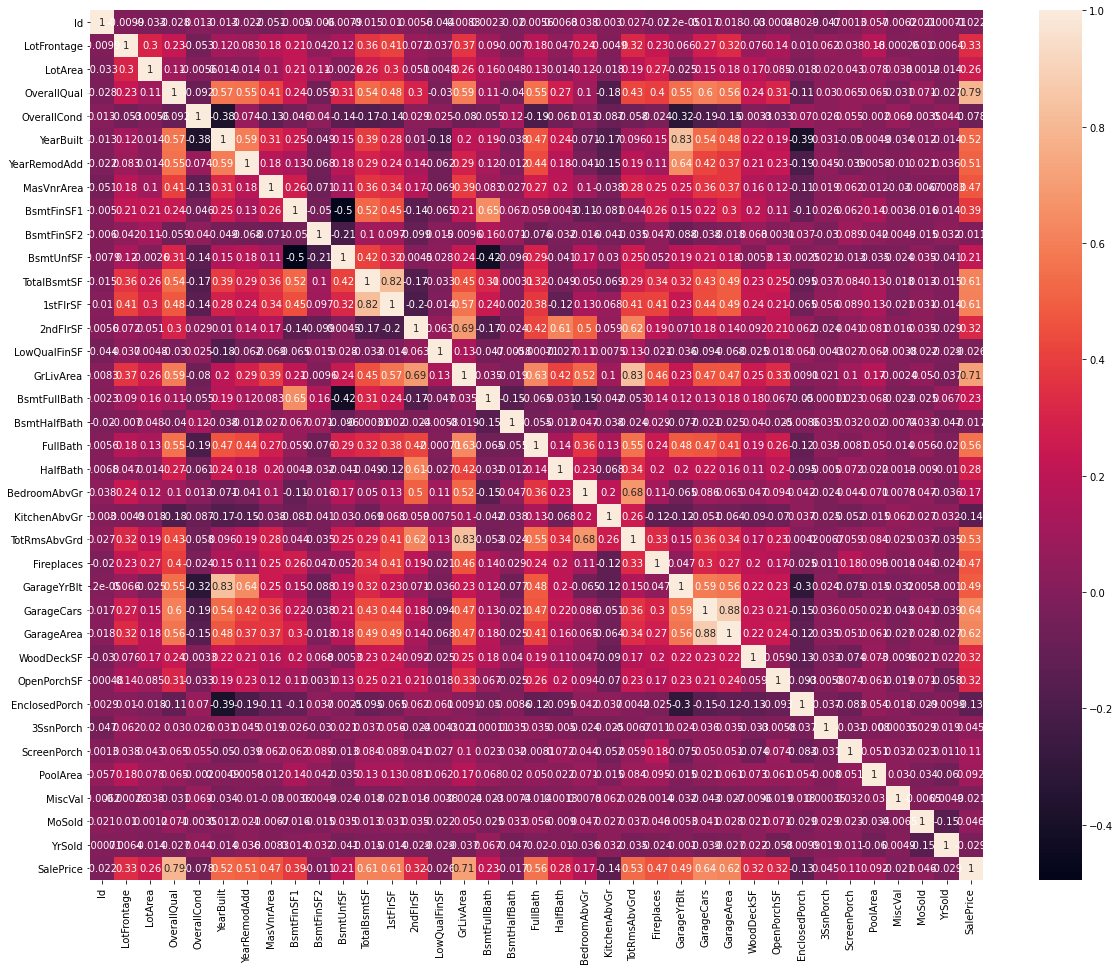

In [106]:
# Plotting a heatmap among the numerical variables

plt.figure(figsize=(20,16))
sns.heatmap(numeric.corr(),annot=True)
plt.show()

In [107]:
#Dropping month and year values as they won't add any value to the model

df_house = df_house.drop(['MoSold','YrSold','YearBuilt','YearRemodAdd','GarageYrBlt'], axis = 1)

df_house.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour  \
0         60       RL         65.0   8450.0   Pave  None      Reg         Lvl   
1         20       RL         80.0   9600.0   Pave  None      Reg         Lvl   
2         60       RL         68.0  11250.0   Pave  None      IR1         Lvl   
3         70       RL         60.0   9550.0   Pave  None      IR1         Lvl   
4         60       RL         84.0  14260.0   Pave  None      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl Exterior1st  \
0     2Story            7            5     Gable  CompShg     VinylSd   
1     1Story            6            8     Gable  CompShg     MetalSd   
2     2Story            7            5     Gable  CompShg     VinylSd   
3     2Story            7            5     Gable  CompShg     Wd Sdng   
4     2Story            8            5     Gable  CompShg     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd   
1     MetalSd       None         0.0        TA        TA     CBlock       Gd   
2     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd   
3     Wd Shng       None         0.0        TA        TA     BrkTil       TA   
4     VinylSd    BrkFace       350.0        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0       TA           No          GLQ         706          Unf         0.0   
1       TA           Gd          ALQ         978          Unf         0.0   
2       TA           Mn          GLQ         486          Unf         0.0   
3       Gd           No          ALQ         216          Unf         0.0   
4       TA           Av          GLQ         655          Unf         0.0   

   BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  \
0        150        856.0    GasA        Ex          Y      SBrkr     856.0   
1        284       1262.0    GasA        Ex          Y      SBrkr    1262.0   
2        434        920.0    GasA        Ex          Y      SBrkr     920.0   
3        540        756.0    GasA        Gd          Y      SBrkr     961.0   
4        490       1145.0    GasA        Ex          Y      SBrkr    1145.0   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0     854.0             0     1710.0             1             0         2   
1       0.0             0     1262.0             0             1         2   
2     866.0             0     1786.0             1             0         2   
3     756.0             0     1717.0             1             0         1   
4    1053.0             0     2198.0             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0         1             3             1          Gd             8        Typ   
1         0             3             1          TA             6        Typ   
2         1             3             1          Gd             6        Typ   
3         0             3             1          Gd             7        Typ   
4         1             4             1          Gd             9        Typ   

   Fireplaces FireplaceQu GarageType GarageFinish  GarageCars  GarageArea  \
0           0        None     Attchd          RFn           2       548.0   
1           1          TA     Attchd          RFn           2       460.0   
2

In [108]:
#Dropping these variables as most of their values are the same, so they won't be useful in explaining the variability 
#in the target variable

df_house = df_house.drop(['GarageQual','BsmtFinSF2','LowQualFinSF','BsmtHalfBath','MiscFeature','PavedDrive','BsmtCond','SaleType',
'KitchenAbvGr','CentralAir', '3SsnPorch','ScreenPorch','PoolArea','PoolQC','MiscVal','Street', 'Alley','Utilities','RoofMatl',
'Condition1', 'Condition2','LandSlope', 'Heating','BsmtFinType2', 'Electrical','GarageCond', 'Fence','Functional' ,'ExterCond',], axis = 1)

In [109]:
#Checking the shape of resulting dataset

df_house.shape

(1460, 46)

### Encoding for categorical variables

In [110]:
#Label encoding for ordinal variables by ranking

df_house['LandContour'] = df_house['LandContour'].map({'Lvl': 3, 'Bnk': 2, 'HLS': 1, 'Low': 0})
df_house['LotShape'] = df_house['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
df_house['ExterQual'] = df_house['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
df_house['BsmtQual'] = df_house['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df_house['BsmtExposure'] = df_house['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
df_house['BsmtFinType1'] = df_house['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
df_house['HeatingQC'] = df_house['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df_house['KitchenQual'] = df_house['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df_house['FireplaceQu'] = df_house['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df_house['GarageFinish'] = df_house['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
df_house['BldgType'] = df_house['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
df_house['HouseStyle'] = df_house['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
df_house['LotConfig'] = df_house['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
df_house['MasVnrType'] = df_house['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
df_house['SaleCondition'] = df_house['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})

In [111]:
#One hot encoding the categorical  columns
df_house = pd.get_dummies(data=df_house,columns=["MSZoning","Neighborhood","RoofStyle","Exterior1st","Exterior2nd",
                                                 "Foundation","GarageType"],drop_first=True)

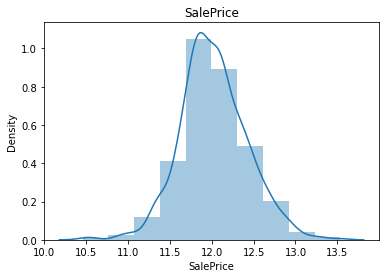

In [112]:
#Tranforming the SalePrice (target) variable for further modelling steps

df_house['SalePrice'] = np.log1p(df_house['SalePrice'])

plt.title('SalePrice')
sns.distplot(df_house['SalePrice'], bins=10)
plt.show()

### Defining variables for model building

In [113]:
# Assigning all feature variable to X

X = df_house.drop(['SalePrice'], axis=1)

In [114]:
# Assigning target response variable to y

y = df_house['SalePrice']

## Train - test split

In [115]:
# split into train and test

np.random.seed(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=50)

In [116]:
# Initializing the scaler variable

scaler = StandardScaler()

scaler.fit(X_train)

StandardScaler()

In [117]:
X_train = pd.DataFrame(data=scaler.transform(X_train),columns=X_train.columns)

X_test = pd.DataFrame(data=scaler.transform(X_test),columns=X_test.columns)

## RFE for feature elimination

In [118]:
# Running RFE for 50 features as output

lm = LinearRegression()
lm.fit(X_train, y_train)


rfe = RFE(lm,n_features_to_select=50)            
rfe = rfe.fit(X_train, y_train)

In [119]:
#Columns selected by RFE

[i for i in list(zip(X_train.columns,rfe.support_,rfe.ranking_)) if i[1]==True]

[('MSSubClass', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('BsmtQual', True, 1),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('KitchenQual', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('FireplaceQu', True, 1),
 ('GarageFinish', True, 1),
 ('GarageCars', True, 1),
 ('GarageArea', True, 1),
 ('SaleCondition', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('Neighborhood_Crawfor', True, 1),
 ('Neighborhood_Edwards', True, 1),
 ('Neighborhood_IDOTRR', True, 1),
 ('Neighborhood_MeadowV', True, 1),
 ('Neighborhood_NAmes', True, 1),
 ('Neighborhood_NWAmes', True, 1),
 ('Neighborhood_NoRidge', True, 1),
 ('Neighborhood_NridgHt', True, 1),
 ('Neigh

In [120]:
#Selecting features from RFE

X_train.columns[rfe.support_]

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'FireplaceQu',
       'GarageFinish', 'GarageCars', 'GarageArea', 'SaleCondition',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_NAmes', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_StoneBr', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_CBlock', 'Exterior1st_Wd Sdng', 'Exterior2nd_Stucco',
       'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Stone',
       'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn',
       'GarageType_Detchd', 'GarageType_None'],
  

In [121]:
import statsmodels.api as sm  

from statsmodels.stats.outliers_influence import variance_inflation_factor


In [130]:
#Building a linear regression model using statsmodels

def lin_reg(col):
    X_train_model = sm.add_constant(X_train[col])
    lm = sm.OLS(y_train.values, X_train_model).fit()
    print(lm.summary())
    return lm

In [131]:
#Calculating the VIF values

def vif_score(col):
    xtrain_df = X_train[col]
    vif_df = pd.DataFrame()
    vif_df['Features'] = xtrain_df.columns
    vif_df['VIF'] = [variance_inflation_factor(xtrain_df.values, i) for i in range(xtrain_df.shape[1])]
    vif_df = vif_df.sort_values(by='VIF',ascending=False)
    return vif_df

In [132]:
X_train.columns[rfe.support_]

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'FireplaceQu',
       'GarageFinish', 'GarageCars', 'GarageArea', 'SaleCondition',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_NAmes', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_StoneBr', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_CBlock', 'Exterior1st_Wd Sdng', 'Exterior2nd_Stucco',
       'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Stone',
       'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn',
       'GarageType_Detchd', 'GarageType_None'],
  

In [133]:
cols = X_train.columns[rfe.support_].to_list()

In [134]:
lin_reg(cols)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     212.3
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:06:00   Log-Likelihood:                 752.42
No. Observations:                1021   AIC:                            -1403.
Df Residuals:                     970   BIC:                            -1151.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.0186 

In [135]:
vif_score(X_train.columns[rfe.support_])

Features        VIF
25           MSZoning_RL  62.222638
26           MSZoning_RM  45.562020
12             GrLivArea  25.437115
45     GarageType_Attchd  25.423775
11              2ndFlrSF  22.045806
48     GarageType_Detchd  20.053672
10              1stFlrSF  18.454559
23           MSZoning_FV  16.014329
47    GarageType_BuiltIn   7.917363
49       GarageType_None   7.823731
8            TotalBsmtSF   7.479199
20            GarageCars   6.695211
21            GarageArea   6.222291
24           MSZoning_RH   5.292775
43      Foundation_PConc   5.042824
2            OverallQual   3.889111
17          TotRmsAbvGrd   3.851891
42     Foundation_CBlock   3.796516
7              BsmtUnfSF   2.961614
4               BsmtQual   2.894664
14              FullBath   2.841192
19          GarageFinish   2.612186
6           BsmtFinType1   2.536040
16           KitchenQual   2.502143
35  Neighborhood_OldTown   2.340438
15              HalfBath   2.246308
46    GarageType_Basment   2.227816
13          BsmtFullBath   2.207315
1                LotArea   2.070379
0             MSSubClass   1.838202
29   Neighborhood_IDOTRR   1.735652
9              HeatingQC   1.703909
18           FireplaceQu   1.696782
31    Neighborhood_NAmes   1.693459
5           BsmtExposure   1.557798
3            OverallCond   1.509264
34  Neighborhood_NridgHt   1.446740
30  Neighborhood_MeadowV   1.376820
27  Neighborhood_Crawfor   1.354754
32   Neighborhood_NWAmes   1.332168
28  Neighborhood_Edwards   1.324420
33  Neighborhood_NoRidge   1.276774
40   Exterior1st_Wd Sdng   1.272005
36  Neighborhood_StoneBr   1.196395
41    Exterior2nd_Stucco   1.162891
38   Exterior1st_BrkFace   1.158314
44      Foundation_Stone   1.157608
22         SaleCondition   1.144915
39    Exterior1st_CBlock   1.069703
37   Exterior1st_BrkComm   1.049349

In [127]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

Variable  rfe_support  rfe_ranking
0            OverallQual         True            1
1               BsmtQual         True            1
2           BsmtFullBath         True            1
3               FullBath         True            1
4            KitchenQual         True            1
5           TotRmsAbvGrd         True            1
6             GarageCars         True            1
7          SaleCondition         True            1
8            MSZoning_FV         True            1
9            MSZoning_RH         True            1
10           MSZoning_RL         True            1
11           MSZoning_RM         True            1
12  Neighborhood_Blueste         True            1
13   Neighborhood_BrDale         True            1
14  Neighborhood_BrkSide         True            1
15  Neighborhood_ClearCr         True            1
16  Neighborhood_Crawfor         True            1
17  Neighborhood_MeadowV         True            1
18  Neighborhood_NPkVill         True            1
19   Neighborhood_NWAmes         True            1
20  Neighborhood_NoRidge         True            1
21  Neighborhood_NridgHt         True            1
22    Neighborhood_SWISU         True            1
23  Neighborhood_Somerst         True            1
24  Neighborhood_StoneBr         True            1
25   Neighborhood_Timber         True            1
26  Neighborhood_Veenker         True            1
27     RoofStyle_Gambrel         True            1
28     RoofStyle_Mansard         True            1
29        RoofStyle_Shed         True            1
30   Exterior1st_BrkComm         True            1
31   Exterior1st_BrkFace         True            1
32   Exterior1st_ImStucc         True            1
33     Exterior1st_Stone         True            1
34   Exterior2nd_AsphShn         True            1
35   Exterior2nd_ImStucc         True            1
36     Exterior2nd_Other         True            1
37    Exterior2nd_Stucco         True            1
38   Exterior2nd_Wd Shng         True            1
39     Foundation_CBlock         True            1
40      Foundation_PConc         True            1
41       Foundation_Slab         True            1
42      Foundation_Stone         True            1
43       Foundation_Wood         True            1
44     GarageType_Attchd         True            1
45    GarageType_Basment         True            1
46    GarageType_BuiltIn         True            1
47    GarageType_CarPort         True            1
48     GarageType_Detchd         True            1
49       GarageType_None         True            1

In [136]:
X_test_lm = sm.add_constant(X_test)

In [137]:
y_pred = lm.predict(X_test_lm)

Text(0, 0.5, 'y_pred')

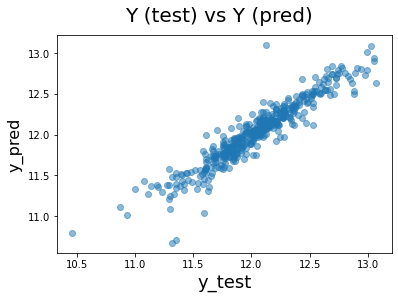

In [138]:
# y_test vs y_pred

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('Y (test) vs Y (pred)', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16)  

In [139]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

Variable  rfe_support  rfe_ranking
0             MSSubClass         True            1
1                LotArea         True            1
2            OverallQual         True            1
3            OverallCond         True            1
4               BsmtQual         True            1
5           BsmtExposure         True            1
6           BsmtFinType1         True            1
7              BsmtUnfSF         True            1
8            TotalBsmtSF         True            1
9              HeatingQC         True            1
10              1stFlrSF         True            1
11              2ndFlrSF         True            1
12             GrLivArea         True            1
13          BsmtFullBath         True            1
14              FullBath         True            1
15              HalfBath         True            1
16           KitchenQual         True            1
17          TotRmsAbvGrd         True            1
18           FireplaceQu         True            1
19          GarageFinish         True            1
20            GarageCars         True            1
21            GarageArea         True            1
22         SaleCondition         True            1
23           MSZoning_FV         True            1
24           MSZoning_RH         True            1
25           MSZoning_RL         True            1
26           MSZoning_RM         True            1
27  Neighborhood_Crawfor         True            1
28  Neighborhood_Edwards         True            1
29   Neighborhood_IDOTRR         True            1
30  Neighborhood_MeadowV         True            1
31    Neighborhood_NAmes         True            1
32   Neighborhood_NWAmes         True            1
33  Neighborhood_NoRidge         True            1
34  Neighborhood_NridgHt         True            1
35  Neighborhood_OldTown         True            1
36  Neighborhood_StoneBr         True            1
37   Exterior1st_BrkComm         True            1
38   Exterior1st_BrkFace         True            1
39    Exterior1st_CBlock         True            1
40   Exterior1st_Wd Sdng         True            1
41    Exterior2nd_Stucco         True            1
42     Foundation_CBlock         True            1
43      Foundation_PConc         True            1
44      Foundation_Stone         True            1
45     GarageType_Attchd         True            1
46    GarageType_Basment         True            1
47    GarageType_BuiltIn         True            1
48     GarageType_Detchd         True            1
49       GarageType_None         True            1

## Ridge Regression

In [140]:
# list of alphas/lambda values to be checked for the penalty component of Ridge regression equation

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 30,50, 100 ]}

ridge = Ridge()

# Grid search cross validation for tuning the hyperparameter alpha

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 50, 100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [141]:
# looking at the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)

ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]

ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
25         100         -0.080780        -0.091126                1
24          50         -0.079729        -0.091435                2
23          30         -0.079251        -0.091719                3
22          20         -0.078955        -0.091971                4
21        10.0         -0.078542        -0.092293                5
20         9.0         -0.078483        -0.092329                6
19         8.0         -0.078418        -0.092368                7
18         7.0         -0.078344        -0.092407                8
17         6.0         -0.078261        -0.092447                9
16         5.0         -0.078181        -0.092494               10
15         4.0         -0.078095        -0.092584               11
14         3.0         -0.077996        -0.092688               12
13         2.0         -0.077893        -0.092821               13
12         1.0         -0.077772        -0.093010               14
11         0.9         -0.077762        -0.093034               15
10         0.8         -0.077751        -0.093061               16
9          0.7         -0.077741        -0.093090               17
8          0.6         -0.077730        -0.093122               18
7          0.5         -0.077719        -0.093156               19
6          0.4         -0.077708        -0.093192               20
5          0.3         -0.077698        -0.093232               21
4          0.2         -0.077687        -0.093273               22
3          0.1         -0.077677        -0.093317               23
2         0.01         -0.077668        -0.093361               24
1        0.001         -0.077667        -0.093366               25
0       0.0001         -0.077667        -0.093366               26

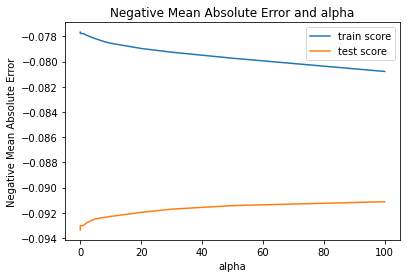

In [142]:
# plotting mean test and train scores with alpha/lambda values

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')

plt.show()

In [133]:
# getting the best value for alpha/lambda

ridge_model_cv.best_estimator_

Ridge(alpha=2.0)

In [146]:
# check the coefficient values with alpha = 2

alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.0838573 ,  0.04059039,  0.0498028 ,  0.079475  ,  0.12320783,
        0.07092346,  0.04018181,  0.07658026,  0.10286766,  0.06651908,
        0.07303327,  0.08627105, -0.01123426, -0.0695109 , -0.11973094,
        0.13918751,  0.10375647, -0.0440221 , -0.06817023, -0.03795666,
       -0.16408576, -0.05147727,  0.14409495,  0.07980391,  0.1128859 ,
        0.05544153, -0.07637611, -0.03228631, -0.04475861,  0.10660913,
        0.07017084,  0.0738707 ,  0.05757651,  0.04860397, -0.1726318 ,
       -0.01624495,  0.02259259, -0.05069091, -0.07380656, -0.08446282,
        0.0261879 ,  0.06303849,  0.07191747,  0.06357332,  0.04138778,
        0.08476049,  0.07741103,  0.08855638,  0.04422269,  0.03900073])

In [147]:
# Check the mean squared error

from sklearn.metrics import  r2_score,mean_squared_error

mean_squared_error(y_test, ridge.predict(X_test))

0.024141046817712328

In [148]:
# Put the Features and coefficient in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})

ridge_df.reset_index(drop=True, inplace=True)

ridge_df

Features  Coefficient
0            OverallQual       0.0839
1            OverallCond       0.0406
2               BsmtQual       0.0498
3           BsmtFullBath       0.0795
4               FullBath       0.1232
5               HalfBath       0.0709
6            KitchenQual       0.0402
7             Fireplaces       0.0766
8             GarageCars       0.1029
9            MSZoning_FV       0.0665
10           MSZoning_RH       0.0730
11           MSZoning_RL       0.0863
12           MSZoning_RM      -0.0112
13  Neighborhood_Blueste      -0.0695
14   Neighborhood_BrDale      -0.1197
15  Neighborhood_ClearCr       0.1392
16  Neighborhood_Crawfor       0.1038
17  Neighborhood_Edwards      -0.0440
18  Neighborhood_Gilbert      -0.0682
19   Neighborhood_IDOTRR      -0.0380
20  Neighborhood_MeadowV      -0.1641
21   Neighborhood_NWAmes      -0.0515
22  Neighborhood_NoRidge       0.1441
23  Neighborhood_NridgHt       0.0798
24  Neighborhood_StoneBr       0.1129
25  Neighborhood_Veenker       0.0554
26       RoofStyle_Gable      -0.0764
27     RoofStyle_Gambrel      -0.0323
28         RoofStyle_Hip      -0.0448
29   Exterior1st_BrkFace       0.1066
30   Exterior1st_CemntBd       0.0702
31     Exterior1st_Stone       0.0739
32    Exterior1st_Stucco       0.0576
33   Exterior2nd_AsphShn       0.0486
34   Exterior2nd_Brk Cmn      -0.1726
35   Exterior2nd_CmentBd      -0.0162
36   Exterior2nd_ImStucc       0.0226
37     Exterior2nd_Stone      -0.0507
38    Exterior2nd_Stucco      -0.0738
39   Exterior2nd_Wd Shng      -0.0845
40     Foundation_CBlock       0.0262
41      Foundation_PConc       0.0630
42       Foundation_Slab       0.0719
43      Foundation_Stone       0.0636
44       Foundation_Wood       0.0414
45     GarageType_Attchd       0.0848
46    GarageType_Basment       0.0774
47    GarageType_BuiltIn       0.0886
48     GarageType_Detchd       0.0442
49       GarageType_None       0.0390

In [149]:
y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.861750226694382
0.8576957917181629


## Lasso Regression

In [137]:
#Initializing the lasso variable

lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# Grid search for tuning the alpha

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [138]:
# Looking at the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)

lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
1       0.0002         -0.106932        -0.113537                1
2       0.0003         -0.107422        -0.113555                2
3       0.0004         -0.107907        -0.113793                3
0       0.0001         -0.106209        -0.114013                4
4       0.0005         -0.108357        -0.114059                5
5        0.001         -0.110271        -0.115386                6
6        0.002         -0.113334        -0.117996                7
7        0.003         -0.115961        -0.119935                8
8        0.004         -0.117727        -0.121044                9
9        0.005         -0.118843        -0.121916               10
10        0.01         -0.123699        -0.126414               11

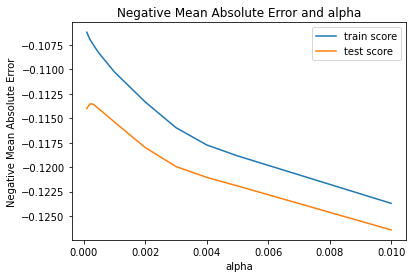

In [139]:
# plotting mean test and train scores with alpha values

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [140]:
# getting the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.0002)

In [151]:
# check the coefficient values with lambda = 0.0002

alpha = 0.0002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 0.08464949,  0.04034948,  0.04895788,  0.07921293,  0.12290522,
        0.07072023,  0.04017161,  0.07560904,  0.10165926,  0.07674748,
        0.07150674,  0.09749737, -0.        , -0.00349992, -0.12045113,
        0.14833687,  0.10160805, -0.03961868, -0.06520603, -0.03354528,
       -0.17906239, -0.04889267,  0.1485821 ,  0.07873793,  0.11335451,
        0.04448085, -0.05958147, -0.        , -0.02720898,  0.10481262,
        0.05755494,  0.        ,  0.03893435,  0.        , -0.19279557,
        0.        ,  0.        , -0.        , -0.05862246, -0.07930969,
        0.02092996,  0.05737394,  0.0588469 ,  0.04623834,  0.        ,
        0.0508234 ,  0.03973122,  0.05452342,  0.0074092 ,  0.        ])

In [152]:
# Check the mean squared error

mean_squared_error(y_test, lasso.predict(X_test))

0.024111913571287703

In [153]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

Features  Coefficient
0            OverallQual       0.0846
1            OverallCond       0.0403
2               BsmtQual       0.0490
3           BsmtFullBath       0.0792
4               FullBath       0.1229
5               HalfBath       0.0707
6            KitchenQual       0.0402
7             Fireplaces       0.0756
8             GarageCars       0.1017
9            MSZoning_FV       0.0767
10           MSZoning_RH       0.0715
11           MSZoning_RL       0.0975
12  Neighborhood_Blueste      -0.0035
13   Neighborhood_BrDale      -0.1205
14  Neighborhood_ClearCr       0.1483
15  Neighborhood_Crawfor       0.1016
16  Neighborhood_Edwards      -0.0396
17  Neighborhood_Gilbert      -0.0652
18   Neighborhood_IDOTRR      -0.0335
19  Neighborhood_MeadowV      -0.1791
20   Neighborhood_NWAmes      -0.0489
21  Neighborhood_NoRidge       0.1486
22  Neighborhood_NridgHt       0.0787
23  Neighborhood_StoneBr       0.1134
24  Neighborhood_Veenker       0.0445
25       RoofStyle_Gable      -0.0596
26         RoofStyle_Hip      -0.0272
27   Exterior1st_BrkFace       0.1048
28   Exterior1st_CemntBd       0.0576
29    Exterior1st_Stucco       0.0389
30   Exterior2nd_Brk Cmn      -0.1928
31    Exterior2nd_Stucco      -0.0586
32   Exterior2nd_Wd Shng      -0.0793
33     Foundation_CBlock       0.0209
34      Foundation_PConc       0.0574
35       Foundation_Slab       0.0588
36      Foundation_Stone       0.0462
37     GarageType_Attchd       0.0508
38    GarageType_Basment       0.0397
39    GarageType_BuiltIn       0.0545
40     GarageType_Detchd       0.0074

In [154]:
y_pred_train = lasso.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_pred_train))

y_pred_test = lasso.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_pred_test))

0.8606236323531895
0.8578675234412502
